<a href="https://colab.research.google.com/github/Ledocquicourt/Ledocquicourt/blob/main/Copie_de_SOB_CSV_V6_encoded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SOB

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings #Used to ignore the warning given as output of the code.
warnings.filterwarnings('ignore')

import numpy as np # Basic libraries of python for numeric and dataframe computations.
import pandas as pd

import matplotlib.pyplot as plt #Basic library for data visualization.
import seaborn as sns #Slightly advanced library for data visualization

# from sklearn.metrics.pairwise import cosine_similarity #To compute the cosine similarity between two vectors.
from collections import defaultdict #A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error # A performance metrics in sklearn.

In [ ]:
#Importing the dataset.
#anouk =pd.read_excel('SOBMaster_20220125SOB_CleanV0_DrGrek_March9_2020_xls.xls', index_col=0)

In [ ]:
#Importing the dataset.
anouk =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/01_Anouk/SO_TAG LEADERSHIP_ATHLETE_S SURVEY_March_10_2022_10.23.csv')

**Data dictionnary**

The following data are "qualtrix data" that do not need to be utilised or analysed and are deleted.
* StartDate             
* EndDate                
* Status                 
* IPAddress              
* Progress               
* Duration (in seconds)  
* Finished               
* RecordedDate           
* ResponseId             
* RecipientLastName      
* RecipientFirstName     
* RecipientEmail        
* ExternalReference      
* LocationLatitude       
* LocationLongitude      
* DistributionChannel
* User language 
    
**Subject ID**
 * Q9_1 : "Please fill in - Athlete's code" => Unique ID of each subject 
 
**Demographics**
 * Q9_2  : "Please fill in - Year of birth" => Year of birth
 * Q10  : "What is your gender?" Male/Female => Gender
 * Q11 : "What is your ethnicity?" => Ethnicity
 
**History**

 * Q10.1 : "Did you have a leading role in the past? For example: SO-ambassador, assistent-coach, public speaker, SO-messenger" => yes/no              
 * Q12 : "Have you already taken the Athlete Leadership Training?" => yes/no                    
 * Q11.1 : "How many times have you taken this Athlete's Survey yet?" Do not count the Test Survey => not yet, 1 time, 2 times, ...

**Random questionnaire  => I agree (1), In between (2), I do not agree (3)**
 * Q1_1 : "I am leader of Special Olympics because people said that I would make a good leader. - Click on the bullet that best matches your feeling."                   
 * Q2_1 : "I am capable (4) of being a leader (5) of Special Olympics. - Click on the bullet that best matches your feeling."             
 * Q3_1 : "I am leader of Special Olympics because people said that I would make a good leader. - Click on the bullet that best matches your feeling."                 
 * Q4_1 : "Being a leader of Special Olympics is very interesting (6). - Click on the bullet that best matches your feeling."                 
 * Q5_1 : "I see plenty of chances to play my role as a leader of Special Olympics. - Click on the bullet that best matches your feeling."                  
 * Q6_1 : "It is important to me to do well as a leader of Special Olympics. - Click on the bullet that best matches your feeling."                 
 * Q7_1 : "Being a leader of Special Olympics is useful for changing the way others think about intellectual disabilities. - Click on the bullet that best matches your feeling."                
 * Q8_1 :Being a leader of Special Olympics makes me feel better about myself. - Click on the bullet that best matches your feeling.               
 * Q9_1.1 : "I feel accepted by people without intellectual disabilities who are not involved in Special Olympics. - Click on the bullet that best matches your feeling."            
 * Q10_1 : "Being a leader of Special Olympics is boring. - Click on the bullet that best matches your feeling."             
 * Q11_1 : "I know what being a leader of Special Olympics means. - Click on the bullet that best matches your feeling."
 * Q12_1 : I have some saying in what I do as a leader of Special Olympics. - Click on the bullet that best matches your feeling                
 * Q13_1 : Being a leader of Special Olympics can help me to reach my goals (7). - Click on the bullet that best matches your feeling             
 * Q14_1 : "14. I feel distant (8) to people without Intellectual Disabilities who are not involved in Special Olympics. - Click on the bullet that best matches your feeling."             
 * Q15_1 : "15. I feel very stressed when working as a leader of Special Olympics. - Click on the bullet that best matches your feeling."	             
 * Q16_1 : "16. I know what to say when talking about Special Olympics. - Click on the bullet that best matches your feeling"
 * Q17_1 : "17. Being a leader of Special Olympics helps me to spend more time with people without intellectual disabilities who are not involved in Special Olympics. - Click on the bullet that best matches your feeling."	               
 * Q18_1 : "18. I have to work hard to be a leader of Special Olympics. - Click on the bullet that best matches your feeling. 
 * Q19_1 : 219. Being a leader of Special Olympics is important because it helps me in being more independent (9).           
 * Q20_1 : "20. It is likely that I can become friends with people without intellectual disabilities, if we spend more time together. - Click on the bullet that best matches your feeling."	            
 * Q21_1 : "21. It is my choice to be a leader of Special Olympics. - Click on the bullet that best matches your feeling.    
 * 22. Being a leader of Special Olympics improves my sports performances (2). - Click on the bullet that best matches your feeling	
 * Q37_1 :                
 * Q23_1 : "23. I enjoy myself when working as a leader of Special Olympics. - Click on the bullet that best matches your feeling.	              
 * Q24_1 : "24. Being a leader of Special Olympics helps me to know more about the organization. - Click on the bullet that best matches your feeling."             
 * Q25_1 : "25. I am very good at making plans for my future. - Click on the bullet that best matches your feeling.         
 * Q26_1 : "26. Being a leader of Special Olympics will improve my inclusion (10) in my community (11).                
 * Q27_1 : "27. I am pretty good at being a leader of Special Olympics. - Click on the bullet that best matches your feeling"   
 * SC0 :   

**Group of related questions**
 * Category 1:
 * Category 2:
 * Category 3:
 * Category 4:
 * Category 5:
 * Category 6:

In [ ]:
anouk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   StartDate              146 non-null    object
 1   EndDate                146 non-null    object
 2   Status                 146 non-null    object
 3   IPAddress              137 non-null    object
 4   Progress               146 non-null    object
 5   Duration (in seconds)  146 non-null    object
 6   Finished               146 non-null    object
 7   RecordedDate           146 non-null    object
 8   ResponseId             146 non-null    object
 9   RecipientLastName      2 non-null      object
 10  RecipientFirstName     2 non-null      object
 11  RecipientEmail         2 non-null      object
 12  ExternalReference      2 non-null      object
 13  LocationLatitude       145 non-null    object
 14  LocationLongitude      145 non-null    object
 15  DistributionChannel    

**Let's prepare and clean the data**

**First let's remove the column 1 to 15 as we do not have to use them.**
 
* Status                 
* IPAddress              
* Progress               
* Duration (in seconds)  
* Finished               
* RecordedDate           
* ResponseId             
* RecipientLastName      
* RecipientFirstName     
* RecipientEmail        
* ExternalReference      
* LocationLatitude       
* LocationLongitude      
* DistributionChannel
* User language

In [ ]:
anouk.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q19_1,Q20_1,Q21_1,Q37_1,Q23_1,Q24_1,Q25_1,Q26_1,Q27_1,SC0
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,19. Being a leader of Special Olympics is impo...,20. It is likely that I can become friends \nw...,21. It is my choice to be a leader of Special ...,22. Being a leader of Special Olympics improve...,23. I enjoy myself when working as a leader of...,24. Being a leader of Special Olympics helps m...,25. I am very good at making plans for my futu...,26. Being a leader of Special Olympics will im...,27. I am pretty good at being a leader of Spec...,Score
1,"{""ImportId"":""startDate"",""timeZone"":""Europe/Ber...","{""ImportId"":""endDate"",""timeZone"":""Europe/Berlin""}","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""Europe/...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID30_1""}","{""ImportId"":""QID31_1""}","{""ImportId"":""QID32_1""}","{""ImportId"":""QID46_1""}","{""ImportId"":""QID34_1""}","{""ImportId"":""QID35_1""}","{""ImportId"":""QID36_1""}","{""ImportId"":""QID37_1""}","{""ImportId"":""QID38_1""}","{""ImportId"":""SC_b8HACbteiFGBYtU""}"
2,2021-06-08 16:20:07,2021-06-09 18:03:34,IP Address,5.62.20.51,100,92607,True,2021-06-09 18:03:34,R_2xEjHhTPNtP3Ry0,NaN,...,I do not agree\n\n,I agree\n\n \n,I agree\n\n \n,I do not agree\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,In between\n\n\n,69
3,2021-06-09 17:21:28,2021-06-09 18:03:38,IP Address,107.77.207.77,100,2530,True,2021-06-09 18:03:40,R_27wn06S1C4ca8iC,NaN,...,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,74
4,2021-06-09 18:06:55,2021-06-09 18:11:18,IP Address,5.62.20.51,100,262,True,2021-06-09 18:11:18,R_eqRjY9NIrRR9eNP,NaN,...,In between\n\n\n,I agree\n\n \n,I agree\n\n \n,In between\n \n,In between\n\n\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,70


In [ ]:
anouk.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 2 to 145
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q9_1    144 non-null    object
 1   Q9_2    144 non-null    object
 2   Q10     144 non-null    object
 3   Q11     144 non-null    object
 4   Q10.1   144 non-null    object
 5   Q12     144 non-null    object
 6   Q11.1   144 non-null    object
 7   Q1_1    144 non-null    object
 8   Q2_1    144 non-null    object
 9   Q3_1    144 non-null    object
 10  Q4_1    144 non-null    object
 11  Q5_1    144 non-null    object
 12  Q6_1    144 non-null    object
 13  Q7_1    144 non-null    object
 14  Q8_1    144 non-null    object
 15  Q9_1.1  144 non-null    object
 16  Q10_1   144 non-null    object
 17  Q11_1   143 non-null    object
 18  Q12_1   143 non-null    object
 19  Q13_1   143 non-null    object
 20  Q14_1   143 non-null    object
 21  Q15_1   143 non-null    object
 22  Q16_1   143 non-null    ob

In [ ]:
del anouk["StartDate"]
del anouk["EndDate"]
del anouk["Status"]
del anouk["IPAddress"]
del anouk["Progress"]
del anouk["Duration (in seconds)"]
del anouk["Finished"]
del anouk["RecordedDate"]
del anouk["ResponseId"]
del anouk["RecipientLastName"]
del anouk["RecipientFirstName"]
del anouk["RecipientEmail"]
del anouk["ExternalReference"]
del anouk["LocationLatitude"]
del anouk["LocationLongitude"]
del anouk["UserLanguage"]
del anouk["DistributionChannel"]
del anouk["SC0"]
anouk = anouk.drop([0])
anouk = anouk.drop([1])
print(anouk)

       Q9_1  Q9_2        Q10                        Q11 Q10.1  Q12      Q11.1  \
2    ILA002  1974  Female\n   native american caucasian   Yes   No  Not yet\n   
3    ILA001  2004  Female\n             White. American   Yes   No  Not yet\n   
4    ILA003  1988    Male\n              white american    No   No  Not yet\n   
5    ILA007  1995    Male\n            african american   Yes   No  Not yet\n   
6     IL008  1991  Female\n                      White     No   No  Not yet\n   
..      ...   ...        ...                        ...   ...  ...        ...   
141  SAA013  2000    Male\n                     African   Yes  Yes    2 times   
142  BEA013  1982    Male\n                       Blank   Yes  Yes    2 times   
143  SAA006  2003  Female\n                     African   Yes  Yes    2 times   
144  SAA017  1987    Male\n                     African   Yes  Yes    2 times   
145  BEA001  1974    Male\n              Européen blanc   Yes  Yes    2 times   

                  Q1_1     

In [ ]:
#printing the top 5 rows of the dataset
anouk.head()

,Q9_1,Q9_2,Q10,Q11,Q10.1,Q12,Q11.1,Q1_1,Q2_1,Q3_1,...,Q18_1,Q19_1,Q20_1,Q21_1,Q37_1,Q23_1,Q24_1,Q25_1,Q26_1,Q27_1
2,ILA002,1974,Female\n,native american caucasian,Yes,No,Not yet\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,...,I agree\n\n \n,I do not agree\n\n,I agree\n\n \n,I agree\n\n \n,I do not agree\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,In between\n\n\n
3,ILA001,2004,Female\n,White. American,Yes,No,Not yet\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,...,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n
4,ILA003,1988,Male\n,white american,No,No,Not yet\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,...,In between\n\n\n,In between\n\n\n,I agree\n\n \n,I agree\n\n \n,In between\n \n,In between\n\n\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n
5,ILA007,1995,Male\n,african american,Yes,No,Not yet\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,...,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,In between\n\n\n
6,IL008,1991,Female\n,White,No,No,Not yet\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,...,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,In between\n \n,I agree\n\n \n,I agree\n\n \n,In between\n\n\n,I agree\n\n \n,In between\n\n\n


Convert 

In [ ]:
#cat_cols contain categorical variables
cat_cols = ["Q9_2"]

In [ ]:
for column in cat_cols:
   print(anouk[column].value_counts())

2004    24
2003    19
1998    10
2005     8
2000     8
1996     8
1974     7
1995     7
1988     6
1991     6
1982     6
1983     3
1987     3
1985     3
1964     3
1992     3
2007     3
2002     2
1990     2
1999     2
1986     2
1979     2
1977     2
1997     2
2ooo     1
1962     1
2006     1
Name: Q9_2, dtype: int64


In [ ]:
print(anouk["Q9_2"].value_counts())

2004    24
2003    19
1998    10
2005     8
2000     8
1996     8
1974     7
1995     7
1988     6
1991     6
1982     6
1983     3
1987     3
1985     3
1964     3
1992     3
2007     3
2002     2
1990     2
1999     2
1986     2
1979     2
1977     2
1997     2
2ooo     1
1962     1
2006     1
Name: Q9_2, dtype: int64


In [ ]:
# 2ooo must be replaced by 2000
anouk.replace(["2ooo",], "2000", inplace=True)
# Than, in Q9_2, object should be changed in number.
anouk["Q9_2"] = pd.to_numeric(anouk["Q9_2"])
anouk=anouk

In [ ]:
#Let's check, if the Q9_2 has been changed in numerical value (int64 in place of object)
anouk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 2 to 145
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q9_1    144 non-null    object
 1   Q9_2    144 non-null    int64 
 2   Q10     144 non-null    object
 3   Q11     144 non-null    object
 4   Q10.1   144 non-null    object
 5   Q12     144 non-null    object
 6   Q11.1   144 non-null    object
 7   Q1_1    144 non-null    object
 8   Q2_1    144 non-null    object
 9   Q3_1    144 non-null    object
 10  Q4_1    144 non-null    object
 11  Q5_1    144 non-null    object
 12  Q6_1    144 non-null    object
 13  Q7_1    144 non-null    object
 14  Q8_1    144 non-null    object
 15  Q9_1.1  144 non-null    object
 16  Q10_1   144 non-null    object
 17  Q11_1   143 non-null    object
 18  Q12_1   143 non-null    object
 19  Q13_1   143 non-null    object
 20  Q14_1   143 non-null    object
 21  Q15_1   143 non-null    object
 22  Q16_1   143 non-null    ob

In [ ]:
#printing the top 5 rows of the dataset
anouk.head()

,Q9_1,Q9_2,Q10,Q11,Q10.1,Q12,Q11.1,Q1_1,Q2_1,Q3_1,...,Q19_1,Q20_1,Q21_1,Q37_1,Q23_1,Q24_1,Q25_1,Q26_1,Q27_1,SC0
2,ILA002,1974,Female\n,native american caucasian,Yes,No,Not yet\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,...,I do not agree\n\n,I agree\n\n \n,I agree\n\n \n,I do not agree\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,In between\n\n\n,69
3,ILA001,2004,Female\n,White. American,Yes,No,Not yet\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,...,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,74
4,ILA003,1988,Male\n,white american,No,No,Not yet\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,...,In between\n\n\n,I agree\n\n \n,I agree\n\n \n,In between\n \n,In between\n\n\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,70
5,ILA007,1995,Male\n,african american,Yes,No,Not yet\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,...,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,In between\n\n\n,76
6,IL008,1991,Female\n,White,No,No,Not yet\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,...,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,In between\n \n,I agree\n\n \n,I agree\n\n \n,In between\n\n\n,I agree\n\n \n,In between\n\n\n,67


In [ ]:
#printing the top 5 rows of the dataset
anouk.head()

,Q9_1,Q9_2,Q10,Q11,Q10.1,Q12,Q11.1,Q1_1,Q2_1,Q3_1,...,Q19_1,Q20_1,Q21_1,Q37_1,Q23_1,Q24_1,Q25_1,Q26_1,Q27_1,SC0
2,ILA002,1974,Female\n,native american caucasian,Yes,No,Not yet\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,...,I do not agree\n\n,I agree\n\n \n,I agree\n\n \n,I do not agree\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,In between\n\n\n,69
3,ILA001,2004,Female\n,White. American,Yes,No,Not yet\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,...,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,74
4,ILA003,1988,Male\n,white american,No,No,Not yet\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,...,In between\n\n\n,I agree\n\n \n,I agree\n\n \n,In between\n \n,In between\n\n\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,70
5,ILA007,1995,Male\n,african american,Yes,No,Not yet\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,...,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,In between\n\n\n,76
6,IL008,1991,Female\n,White,No,No,Not yet\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,...,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,In between\n \n,I agree\n\n \n,I agree\n\n \n,In between\n\n\n,I agree\n\n \n,In between\n\n\n,67


In [ ]:
anouk.describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
Q9_2,144.0,1995.0,10.0,1962.0,1988.0,1998.0,2003.0,2007.0


***II. Preparation of data analysis for the questionnaire***
* Data cleaning = categorical data should be changed in numerical data
* Set of questions:
    - I agree = 3
    - In between = 2
    - I do not agree = 1
* Set of questions:
    - I agree = 1
    - In between = 2
    - I do not agree = 3

In [ ]:
#printing the top 5 rows of the dataset
anouk.head()

,Q9_1,Q9_2,Q10,Q11,Q10.1,Q12,Q11.1,Q1_1,Q2_1,Q3_1,...,Q19_1,Q20_1,Q21_1,Q37_1,Q23_1,Q24_1,Q25_1,Q26_1,Q27_1,SC0
2,ILA002,1974,Female\n,native american caucasian,Yes,No,Not yet\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,...,I do not agree\n\n,I agree\n\n \n,I agree\n\n \n,I do not agree\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,In between\n\n\n,69
3,ILA001,2004,Female\n,White. American,Yes,No,Not yet\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,...,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,74
4,ILA003,1988,Male\n,white american,No,No,Not yet\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,...,In between\n\n\n,I agree\n\n \n,I agree\n\n \n,In between\n \n,In between\n\n\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,70
5,ILA007,1995,Male\n,african american,Yes,No,Not yet\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,...,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,In between\n\n\n,76
6,IL008,1991,Female\n,White,No,No,Not yet\n,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,...,I agree\n\n \n,I agree\n\n \n,I agree\n\n \n,In between\n \n,I agree\n\n \n,I agree\n\n \n,In between\n\n\n,I agree\n\n \n,In between\n\n\n,67


Let's encode the answer to the questions
- Questions = I agree (3), In between(2) and I do not agree(1) : Q1_1, Q2_1, Q4_1, Q5_1, Q6_1, Q7_1, Q8_1, Q9_1, Q11_1 , Q12_1 , Q13_1 ,Q15_1 ,Q16_1 ,Q17_1 ,Q18_1 ,Q19_1 ,Q20_1 ,Q22_1 ,Q22_1 , Q23_1, 24_1, Q25_1, Q26_1, Q27_1

- Questions I agree (1), In between(2) and I do not agree(3) = Q3_1, Q10_1 X,Q14_1


---------------------
## Q1_1 : "I am leader of Special Olympics because people said that I would make a good leader. - Click on the bullet that best matches your feeling."
--------------------

I agree\n\n \n       132
In between\n\n\n      12
Name: Q1_1, dtype: int64
3    132
2     12
Name: Q1_1, dtype: int64


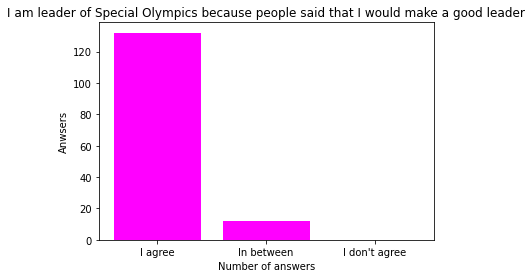

In [ ]:
#Q1_1
print(anouk["Q1_1"].value_counts())
anouk["Q1_1"].replace(["I agree\n\n \n"], "3", inplace=True)
anouk["Q1_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q1_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q1_1"] = pd.to_numeric(anouk["Q1_1"])
print(anouk["Q1_1"].value_counts())

# Data to be ploted
Answer= ("I agree","In between","I don't agree")
Response= (132, 12, 0)

# plotting
plt.title("I am leader of Special Olympics because people said that I would make a good leader")
plt.xlabel("Number of answers")
plt.ylabel("Anwsers")
plt.bar(Answer, Response, color ="magenta")
plt.show()


# Q2_1 : "I am capable (4) of being a leader (5) of Special Olympics. - Click on the bullet that best matches your feeling." 

I agree\n\n \n         125
In between\n\n\n        16
I do not agree\n\n       3
Name: Q2_1, dtype: int64
3    125
2     16
1      3
Name: Q2_1, dtype: int64


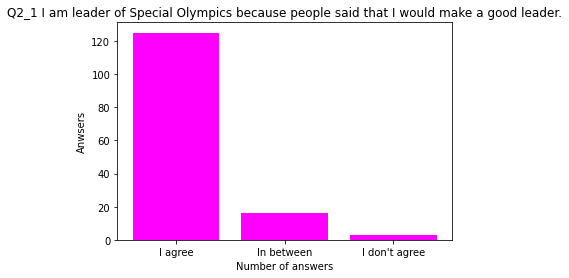

In [ ]:
#1_Q2_1
print(anouk["Q2_1"].value_counts())
anouk["Q2_1"].replace(["I agree\n\n \n"], "3", inplace=True)
anouk["Q2_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q2_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q2_1"] = pd.to_numeric(anouk["Q2_1"])
print(anouk["Q2_1"].value_counts())

# Data to be ploted
Answer= ("I agree","In between","I don't agree")
Response= (125, 16, 3)

# plotting
plt.title("Q2_1 I am leader of Special Olympics because people said that I would make a good leader.")
plt.xlabel("Number of answers")
plt.ylabel("Anwsers")
plt.bar(Answer, Response, color ="magenta")
plt.show()

In [ ]:
#2_Q3_1 I agree (1), In between(2) and I do not agree(3)
print(anouk["Q3_1"].value_counts())
anouk["Q3_1"].replace(["I agree\n\n \n"], "1", inplace=True)
anouk["Q3_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q3_1"].replace(["I do not agree\n\n "], "3", inplace=True)
anouk["Q3_1"] = pd.to_numeric(anouk["Q3_1"])
print(anouk["Q3_1"].value_counts())

I agree\n\n \n         96
In between\n\n\n       29
I do not agree\n\n     19
Name: Q3_1, dtype: int64
1    96
2    29
3    19
Name: Q3_1, dtype: int64


In [ ]:
#3_Q4_1
print(anouk["Q4_1"].value_counts())
anouk["Q4_1"].replace(["I agree\n\n \n"], "3", inplace=True)
anouk["Q4_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q4_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q4_1"] = pd.to_numeric(anouk["Q4_1"])
print(anouk["Q4_1"].value_counts())

I agree\n\n \n         138
In between\n\n\n         4
I do not agree\n\n       2
Name: Q4_1, dtype: int64
3    138
2      4
1      2
Name: Q4_1, dtype: int64


In [ ]:
#4_Q5_1
print(anouk["Q5_1"].value_counts())
anouk["Q5_1"].replace(["I agree\n\n \n"], "3", inplace=True)
anouk["Q5_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q5_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q5_1"] = pd.to_numeric(anouk["Q5_1"])
print(anouk["Q5_1"].value_counts())

I agree\n\n \n         117
In between\n\n\n        22
I do not agree\n\n       5
Name: Q5_1, dtype: int64
3    117
2     22
1      5
Name: Q5_1, dtype: int64


In [ ]:
#5_Q6_1
print(anouk["Q6_1"].value_counts())
anouk["Q6_1"].replace(["I agree\n\n \n"], "3", inplace=True)
anouk["Q6_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q6_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q6_1"] = pd.to_numeric(anouk["Q6_1"])
print(anouk["Q6_1"].value_counts())

I agree\n\n \n       138
In between\n\n\n       6
Name: Q6_1, dtype: int64
3    138
2      6
Name: Q6_1, dtype: int64


In [ ]:
#6_Q7_1
print(anouk["Q7_1"].value_counts())
anouk["Q7_1"].replace(["I agree\n\n \n"], "3", inplace=True)
anouk["Q7_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q7_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q7_1"] = pd.to_numeric(anouk["Q7_1"])
print(anouk["Q7_1"].value_counts())

I agree\n\n \n       128
In between\n\n\n      16
Name: Q7_1, dtype: int64
3    128
2     16
Name: Q7_1, dtype: int64


In [ ]:
#7_Q8_1
print(anouk["Q8_1"].value_counts())
anouk["Q8_1"].replace(["I agree\n\n \n"], "3", inplace=True)
anouk["Q8_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q8_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q8_1"] = pd.to_numeric(anouk["Q8_1"])
print(anouk["Q8_1"].value_counts())

#number_of_visits.plot(kind='bar', figsize=(6,6), color="g")
#plt.title('Visit', size=16, )
#plt.ylabel('Count')
#plt.xlabel('Subject')

I agree\n\n \n         109
In between\n\n\n        29
I do not agree\n\n       6
Name: Q8_1, dtype: int64
3    109
2     29
1      6
Name: Q8_1, dtype: int64


In [ ]:
#8_Q91.1
print(anouk["Q9_1.1"].value_counts())
anouk["Q9_1.1"].replace(["I agree\n\n \n"], "3", inplace=True)
anouk["Q9_1.1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q9_1.1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q9_1.1"] = pd.to_numeric(anouk["Q9_1.1"])
print(anouk["Q9_1.1"].value_counts())

#number_of_visits.plot(kind='bar', figsize=(6,6), color="g")
#plt.title('Visit', size=16, )
#plt.ylabel('Count')
#plt.xlabel('Subject')

I agree\n\n \n         96
In between\n\n\n       32
I do not agree\n\n     16
Name: Q9_1.1, dtype: int64
3    96
2    32
1    16
Name: Q9_1.1, dtype: int64


In [ ]:
#9_Q9_1
print(anouk["Q9_1"].value_counts())
print(anouk["Q9_1"].unique())

ILA002    4
ILA003    4
ILA007    4
SAA011    3
SAA005    3
         ..
ILA004    1
IL008     1
ILA006    1
ILA005    1
SGA002    1
Name: Q9_1, Length: 68, dtype: int64
['ILA002' 'ILA001' 'ILA003' 'ILA007' 'IL008' 'ILA006' 'ILA005' 'ILA10'
 'ILA011' 'ILA009' 'ILA004' 'BEA005' 'BEA009' 'BEA002' 'BEA006' 'BEA008'
 'BEA003' 'BEA001' 'BEA012' 'BEA013' 'BEA011' 'BEA007' 'BEA010' 'BEA014'
 'ILA010' 'ILA008' 'BEA015' 'SAA005' 'SAA001' 'SAA006' 'SAA002' 'SAA004'
 'BEA016' 'SAA010' 'SAA012' 'SAA009' 'SAA011' 'SAA008' 'SAA007' 'SAA016'
 'SAA015' 'SAA017' 'SAA014' 'SAA013' 'SAA022' 'SAA021' 'SAA018' 'SAA019'
 'SAA023' 'SAA020' 'SG1' 'SG5' 'SG6' 'SG10' 'SG4' 'SG2' 'SG11' 'SGA003'
 'SGA007' 'SGA009' 'SGA012' 'SGA006' 'SGA010' 'SGA004' 'SGA011' 'SGA005'
 'SGA001' 'SGA002']


I do not agree\n\n     131
In between\n\n\n         7
I agree\n\n \n           6
Name: Q10_1, dtype: int64
3    131
2      7
1      6
Name: Q10_1, dtype: int64
[3 2 1]
2      3
3      3
4      3
5      3
6      3
      ..
141    3
142    3
143    3
144    3
145    3
Name: Q10_1, Length: 144, dtype: int64


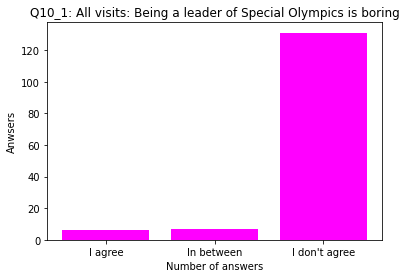

In [ ]:
#10_Q10_1 "Being a leader of Special Olympics is boring. - Click on the bullet that best matches your feeling."   
#I agree (1), In between(2) and I do not agree(3)
print(anouk["Q10_1"].value_counts())
anouk["Q10_1"].replace(["I agree\n\n \n"], "1", inplace=True)
anouk["Q10_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q10_1"].replace(["I do not agree\n\n "], "3", inplace=True)
anouk["Q10_1"] = pd.to_numeric(anouk["Q10_1"])
Q10_1 = pd.to_numeric(anouk["Q10_1"])
print(anouk["Q10_1"].value_counts())
print(anouk["Q10_1"].unique())
print(Q10_1)

# Data to be ploted
Answer= ("I agree","In between","I don't agree")
Response= (6, 7, 131)

# plotting
plt.title("Q10_1: All visits: Being a leader of Special Olympics is boring")
plt.xlabel("Number of answers")
plt.ylabel("Anwsers")
plt.bar(Answer, Response, color ="magenta")
plt.show()

Not yet\n    60
1 time\n     53
2 times      27
3 times       4
Name: Q11.1, dtype: int64
0    60
1    53
2    27
3     4
Name: Q11.1, dtype: int64
[0 1 2 3]


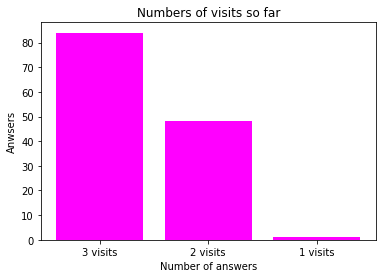

In [ ]:
#11_Q11.1: "How many times have you taken this Athlete's Survey yet?" Do not count the Test Survey => not yet, 1 time, 2 times, ...
print(anouk["Q11.1"].value_counts())
anouk["Q11.1"].replace(["Not yet\n"], "0", inplace=True)
anouk["Q11.1"].replace(["1 time\n"], "1", inplace=True)
anouk["Q11.1"].replace(["2 times"], "2", inplace=True)
anouk["Q11.1"].replace(["3 times"], "3", inplace=True)
anouk["Q11.1"] = pd.to_numeric(anouk["Q11.1"])
print(anouk["Q11.1"].value_counts())
print(anouk["Q11.1"].unique())

# Data to be ploted
Answer= ("3 visits","2 visits","1 visits")
Response= (84, 48, 1)

# plotting
plt.title("Numbers of visits so far")
plt.xlabel("Number of answers")
plt.ylabel("Anwsers")
plt.bar(Answer, Response, color ="magenta")
plt.show()

In [ ]:
#12_Q11_1
print(anouk["Q11_1"].value_counts())
anouk["Q11_1"].replace(["I agree\n\n \n"], "3", inplace=True)
anouk["Q11_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q11_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q11_1"] = pd.to_numeric(anouk["Q11_1"])
print(anouk["Q11_1"].value_counts())
print(anouk["Q11_1"].unique())
print(anouk["Q11_1"])

I agree\n\n \n         84
In between\n\n\n       48
I do not agree\n\n     11
Name: Q11_1, dtype: int64
3.0    84
2.0    48
1.0    11
Name: Q11_1, dtype: int64
[ 2.  1.  3. nan]
2      2.0
3      1.0
4      2.0
5      3.0
6      2.0
      ... 
141    3.0
142    3.0
143    3.0
144    3.0
145    3.0
Name: Q11_1, Length: 144, dtype: float64


In [ ]:
#13_Q12_1
print(anouk["Q12_1"].value_counts())
print(anouk["Q12_1"].value_counts())
anouk["Q12_1"].replace(["I agree\n\n \n",], "3", inplace=True)
anouk["Q12_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q12_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q12_1"] = pd.to_numeric(anouk["Q12_1"])
print(anouk["Q12_1"].value_counts())

I agree\n\n \n         103
In between\n\n\n        30
I do not agree\n\n      10
Name: Q12_1, dtype: int64
I agree\n\n \n         103
In between\n\n\n        30
I do not agree\n\n      10
Name: Q12_1, dtype: int64
3.0    103
2.0     30
1.0     10
Name: Q12_1, dtype: int64


In [ ]:
#14_Q13_1
print(anouk["Q13_1"].value_counts())
anouk["Q13_1"].replace(["I agree\n\n \n",], "3", inplace=True)
anouk["Q13_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q13_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q13_1"] = pd.to_numeric(anouk["Q13_1"])
print(anouk["Q13_1"].value_counts())

I agree\n\n \n       128
In between\n\n\n      15
Name: Q13_1, dtype: int64
3.0    128
2.0     15
Name: Q13_1, dtype: int64


In [ ]:
#Q14_1 I agree (1), In between(2) and I do not agree(3)
print(anouk["Q14_1"].value_counts())
anouk["Q14_1"].replace(["I agree\n\n \n",], "1", inplace=True)
anouk["Q14_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q14_1"].replace(["I do not agree\n\n "], "3", inplace=True)
anouk["Q14_1"] = pd.to_numeric(anouk["Q14_1"])
print(anouk["Q14_1"].value_counts())

I do not agree\n\n     67
In between\n\n\n       40
I agree\n\n \n         36
Name: Q14_1, dtype: int64
3.0    67
2.0    40
1.0    36
Name: Q14_1, dtype: int64


In [ ]:
#15_Q15_1
print(anouk["Q15_1"].value_counts())
anouk["Q15_1"].replace(["I agree\n\n \n",], "3", inplace=True)
anouk["Q15_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q15_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q15_1"] = pd.to_numeric(anouk["Q15_1"])
print(anouk["Q15_1"].value_counts())

I do not agree\n\n     78
In between\n\n\n       40
I agree\n\n \n         25
Name: Q15_1, dtype: int64
1.0    78
2.0    40
3.0    25
Name: Q15_1, dtype: int64


In [ ]:
#16_Q16_1
print(anouk["Q16_1"].value_counts())
anouk["Q16_1"].replace(["I agree\n\n \n"], "3", inplace=True)
anouk["Q16_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q16_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q16_1"] = pd.to_numeric(anouk["Q16_1"])
print(anouk["Q16_1"].value_counts())

I agree\n\n \n         100
In between\n\n\n        39
I do not agree\n\n       4
Name: Q16_1, dtype: int64
3.0    100
2.0     39
1.0      4
Name: Q16_1, dtype: int64


In [ ]:
#17_Q17_1
print(anouk["Q17_1"].value_counts())
anouk["Q17_1"].replace(["I agree\n\n \n"], "3", inplace=True)
anouk["Q17_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q17_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q17_1"] = pd.to_numeric(anouk["Q17_1"])
print(anouk["Q17_1"].value_counts())

I agree\n\n \n         81
In between\n\n\n       40
I do not agree\n\n     22
Name: Q17_1, dtype: int64
3.0    81
2.0    40
1.0    22
Name: Q17_1, dtype: int64


In [ ]:
#18_Q18_1
print(anouk["Q18_1"].value_counts())
anouk["Q18_1"].replace(["I agree\n\n \n"], "3", inplace=True)
anouk["Q18_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q18_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q18_1"] = pd.to_numeric(anouk["Q18_1"])
print(anouk["Q18_1"].value_counts())

I agree\n\n \n         110
In between\n\n\n        21
I do not agree\n\n      12
Name: Q18_1, dtype: int64
3.0    110
2.0     21
1.0     12
Name: Q18_1, dtype: int64


In [ ]:
#19_Q19_1
print(anouk["Q19_1"].value_counts())
anouk["Q19_1"].replace(["I agree\n\n \n"], "3", inplace=True)
anouk["Q19_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q19_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q19_1"] = pd.to_numeric(anouk["Q19_1"])
print(anouk["Q19_1"].value_counts())

I agree\n\n \n         121
In between\n\n\n        15
I do not agree\n\n       7
Name: Q19_1, dtype: int64
3.0    121
2.0     15
1.0      7
Name: Q19_1, dtype: int64


In [ ]:
#20_Q20_1
print(anouk["Q20_1"].value_counts())
anouk["Q20_1"].replace(["I agree\n\n \n"], "3", inplace=True)
anouk["Q20_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q20_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q20_1"] = pd.to_numeric(anouk["Q20_1"])
print(anouk["Q20_1"].value_counts())

I agree\n\n \n         123
In between\n\n\n        15
I do not agree\n\n       5
Name: Q20_1, dtype: int64
3.0    123
2.0     15
1.0      5
Name: Q20_1, dtype: int64


In [ ]:
#21_Q21_1
print(anouk["Q21_1"].value_counts())
anouk["Q21_1"].replace(["I agree\n\n \n"], "3", inplace=True)
anouk["Q21_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q21_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q21_1"] = pd.to_numeric(anouk["Q21_1"])
print(anouk["Q21_1"].value_counts())

I agree\n\n \n         130
In between\n\n\n        12
I do not agree\n\n       1
Name: Q21_1, dtype: int64
3.0    130
2.0     12
1.0      1
Name: Q21_1, dtype: int64


In [ ]:
#22_Q37_1
print(anouk["Q37_1"].value_counts())
anouk["Q37_1"].replace(["I agree\n \n"], "3", inplace=True)
anouk["Q37_1"].replace(["In between\n \n"], "2", inplace=True)
anouk["Q37_1"].replace(["I do not agree\n"], "1", inplace=True)
anouk["Q37_1"] = pd.to_numeric(anouk["Q37_1"])
print(anouk["Q37_1"].value_counts())

I agree\n \n        87
I do not agree\n    28
In between\n \n     28
Name: Q37_1, dtype: int64
3.0    87
1.0    28
2.0    28
Name: Q37_1, dtype: int64


In [ ]:
#23_Q23_1
print(anouk["Q23_1"].value_counts())
anouk["Q23_1"].replace(["I agree\n\n \n"], "3", inplace=True)
anouk["Q23_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q23_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q23_1"] = pd.to_numeric(anouk["Q23_1"])
print(anouk["Q23_1"].value_counts())

I agree\n\n \n         120
In between\n\n\n        22
I do not agree\n\n       1
Name: Q23_1, dtype: int64
3.0    120
2.0     22
1.0      1
Name: Q23_1, dtype: int64


In [ ]:
#24_Q24_1
print(anouk["Q24_1"].value_counts())
anouk["Q24_1"].replace(["I agree\n\n \n"], "3", inplace=True)
anouk["Q24_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q24_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q24_1"] = pd.to_numeric(anouk["Q24_1"])
print(anouk["Q24_1"].value_counts())

I agree\n\n \n         134
In between\n\n\n         8
I do not agree\n\n       1
Name: Q24_1, dtype: int64
3.0    134
2.0      8
1.0      1
Name: Q24_1, dtype: int64


In [ ]:
#25_Q25_1
print(anouk["Q25_1"].value_counts())
anouk["Q25_1"].replace(["I agree\n\n \n"], "3", inplace=True)
anouk["Q25_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q25_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q25_1"] = pd.to_numeric(anouk["Q25_1"])
print(anouk["Q25_1"].value_counts())

I agree\n\n \n         87
In between\n\n\n       46
I do not agree\n\n     10
Name: Q25_1, dtype: int64
3.0    87
2.0    46
1.0    10
Name: Q25_1, dtype: int64


In [ ]:
#26_Q26_1
print(anouk["Q26_1"].value_counts())
anouk["Q26_1"].replace(["I agree\n\n \n"], "3", inplace=True)
anouk["Q26_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q26_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q26_1"] = pd.to_numeric(anouk["Q26_1"])
print(anouk["Q26_1"].value_counts())

I agree\n\n \n         116
In between\n\n\n        20
I do not agree\n\n       7
Name: Q26_1, dtype: int64
3.0    116
2.0     20
1.0      7
Name: Q26_1, dtype: int64


In [ ]:
#27_Q27_1
print(anouk["Q27_1"].value_counts())
anouk["Q27_1"].replace(["I agree\n\n \n"], "3", inplace=True)
anouk["Q27_1"].replace(["In between\n\n\n "], "2", inplace=True)
anouk["Q27_1"].replace(["I do not agree\n\n "], "1", inplace=True)
anouk["Q27_1"] = pd.to_numeric(anouk["Q27_1"])
print(anouk["Q27_1"].value_counts())
print('Q27_1')

I agree\n\n \n         92
In between\n\n\n       44
I do not agree\n\n      7
Name: Q27_1, dtype: int64
3.0    92
2.0    44
1.0     7
Name: Q27_1, dtype: int64
Q27_1


In [ ]:
#printing the top 5 rows of the dataset
anouk.head().T

,2,3,4,5,6
Q9_1,ILA002,ILA001,ILA003,ILA007,IL008
Q9_2,1974,2004,1988,1995,1991
Q10,Female\n,Female\n,Male\n,Male\n,Female\n
Q11,native american caucasian,White. American,white american,african american,White
Q10.1,Yes,Yes,No,Yes,No
Q12,No,No,No,No,No
Q11.1,0,0,0,0,0
Q1_1,3,3,3,3,3
Q2_1,3,3,3,3,3
Q3_1,1,1,1,1,1


Let's clean the gender column (Q10)

In [ ]:
Gender = pd.unique(anouk.Q10)
print(Gender)

['Female\n ' 'Male\n ']


In [ ]:
anouk["Q10"].replace(["Female\n ",], "Female", inplace=True)
anouk["Q10"].replace(["Male\n "], "Male", inplace=True)

In [ ]:
Gender = pd.unique(anouk.Q10)
print(Gender)

['Female' 'Male']


Let's clean the "race" column (Q11)

In [ ]:
Race = pd.unique(anouk.Q11)
print(Race)

['native american caucasian' 'White. American' 'white american'
 'african american' 'White ' 'white' 'asian american taiwanees'
 'caucasian' 'Asian ' 'Blanc' 'White' 'blank' 'blanc' 'blanche' 'Blank'
 'Caucasian' 'Afro American' 'native-american /white' 'BLACK' 'COLOURED'
 'Black' 'WHITE' 'Black ' 'Coloured' 'Belgie' 'African' 'African '
 'African american' 'caucasian american' 'Afrikaans' 'Europese blank'
 'Europees blank' 'blak' 'AFRICAN' 'AFRICAN '
 'native american and caucasian' 'Chinese' 'Indian' 'Malay' 'européenne'
 'blanke' 'Islam' 'Javanese' 'européenne blanc' 'européenne blanche'
 'Blank Europees' 'Native american caucasian' 'Blanke Europese' 'Blank EU'
 'Européen blanc']


In [ ]:
anouk["Q11"].replace(["native american caucasian"], "White", inplace=True)
anouk["Q11"].replace(["White. American"], "White", inplace=True)
anouk["Q11"].replace(["white american"], "White", inplace=True)
anouk["Q11"].replace(["african american"], "African", inplace=True)
anouk["Q11"].replace(["White ",], "White", inplace=True)
anouk["Q11"].replace(["white"], "White", inplace=True)
anouk["Q11"].replace(["asian american taiwanees",], "Asian", inplace=True)
anouk["Q11"].replace(["caucasian"], "White", inplace=True)
anouk["Q11"].replace(["Asian ",], "Asian", inplace=True)
anouk["Q11"].replace(["Blanc"], "White", inplace=True)
anouk["Q11"].replace(["blank",], "White", inplace=True)
anouk["Q11"].replace(["blanche"], "White", inplace=True)
anouk["Q11"].replace(["Caucasian",], "White", inplace=True)
anouk["Q11"].replace(["Afro American"], "African", inplace=True)
anouk["Q11"].replace(["native-american /white",], "White", inplace=True)
anouk["Q11"].replace(["BLACK"], "African", inplace=True)
anouk["Q11"].replace(["COLOURED"], "Coloured", inplace=True)
anouk["Q11"].replace(["Black"], "African", inplace=True)
anouk["Q11"].replace(["WHITE"], "White", inplace=True)
anouk["Q11"].replace(["Black "], "African", inplace=True)
anouk["Q11"].replace(["Coloured"], "Nan", inplace=True)
anouk["Q11"].replace(["Belgie"], "Nan", inplace=True)
anouk["Q11"].replace(["African "], "African", inplace=True)
anouk["Q11"].replace(["African american"], "African", inplace=True)
anouk["Q11"].replace(["blanc"], "White", inplace=True)
anouk["Q11"].replace(["Afrikaans"], "White", inplace=True)
anouk["Q11"].replace(["Europese blank"], "White", inplace=True)
anouk["Q11"].replace(["blak"], "African", inplace=True)
anouk["Q11"].replace(["native american and caucasian"], "White", inplace=True)
anouk["Q11"].replace(["AFRICAN "], "African", inplace=True)
anouk["Q11"].replace(["African american"], "African", inplace=True)
anouk["Q11"].replace(["African american"], "African", inplace=True)
anouk["Q11"].replace(["Chinese"], "Asian", inplace=True)
anouk["Q11"].replace(["Indian"], "Asian", inplace=True)
anouk["Q11"].replace(["Malay"], "Asian", inplace=True)
anouk["Q11"].replace(["blanke"], "Blank", inplace=True)
anouk["Q11"].replace(["native american and caucasian"], "White", inplace=True)
anouk["Q11"].replace(["AFRICAN "], "African", inplace=True)
anouk["Q11"].replace(["AFRICAN"], "African", inplace=True)
anouk["Q11"].replace(["européenne"], "Nan", inplace=True)
anouk["Q11"].replace(["Islam"], "Nan", inplace=True)
anouk["Q11"].replace(["Europees blank"], "White", inplace=True)
anouk["Q11"].replace(["européenne blanc"], "White", inplace=True)
anouk["Q11"].replace(["européenne blanche"], "White", inplace=True)
anouk["Q11"].replace(["Blank Europees"], "White", inplace=True)
anouk["Q11"].replace(["Native american caucasian"], "White", inplace=True)
anouk["Q11"].replace(["Blank EU"], "White", inplace=True)
anouk["Q11"].replace(["Européen blanc"], "White", inplace=True)
anouk["Q11"].replace(["Blank Europees"], "White", inplace=True)
anouk["Q11"].replace(["Blanke Europese"], "White", inplace=True)
anouk["Q11"].replace(["Blank"], "White", inplace=True)
anouk["Q11"].replace(["Javanese"], "Asian", inplace=True)
anouk["Q11"].replace(["caucasian american"], "White", inplace=True)


In [ ]:
Race = pd.unique(anouk.Q11)
print(Race)
print(anouk["Q11"].value_counts())

['White' 'African' 'Asian' 'Nan']
White      60
African    55
Asian      23
Nan         6
Name: Q11, dtype: int64


In [ ]:
anouk["Q11"].replace(["White"], "Caucasian", inplace=True)
print(Race)
print(anouk["Q11"].value_counts())

['White' 'African' 'Asian' 'Nan']
Caucasian    60
African      55
Asian        23
Nan           6
Name: Q11, dtype: int64


In [ ]:
anouk.describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
Q9_2,144.0,1995.0,10.0,1962.0,1988.0,1998.0,2003.0,2007.0
Q11.1,144.0,1.0,1.0,0.0,0.0,1.0,1.0,3.0
Q1_1,144.0,3.0,0.0,2.0,3.0,3.0,3.0,3.0
Q2_1,144.0,3.0,0.0,1.0,3.0,3.0,3.0,3.0
Q3_1,144.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0
Q4_1,144.0,3.0,0.0,1.0,3.0,3.0,3.0,3.0
Q5_1,144.0,3.0,0.0,1.0,3.0,3.0,3.0,3.0
Q6_1,144.0,3.0,0.0,2.0,3.0,3.0,3.0,3.0
Q7_1,144.0,3.0,0.0,2.0,3.0,3.0,3.0,3.0
Q8_1,144.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0


In [ ]:
print(anouk)

       Q9_1  Q9_2     Q10        Q11 Q10.1  Q12  Q11.1  Q1_1  Q2_1  Q3_1  ...  \
2    ILA002  1974  Female  Caucasian   Yes   No      0     3     3     1  ...   
3    ILA001  2004  Female  Caucasian   Yes   No      0     3     3     1  ...   
4    ILA003  1988    Male  Caucasian    No   No      0     3     3     1  ...   
5    ILA007  1995    Male    African   Yes   No      0     3     3     1  ...   
6     IL008  1991  Female  Caucasian    No   No      0     3     3     1  ...   
..      ...   ...     ...        ...   ...  ...    ...   ...   ...   ...  ...   
141  SAA013  2000    Male    African   Yes  Yes      2     3     3     1  ...   
142  BEA013  1982    Male  Caucasian   Yes  Yes      2     2     3     3  ...   
143  SAA006  2003  Female    African   Yes  Yes      2     3     3     1  ...   
144  SAA017  1987    Male    African   Yes  Yes      2     3     3     1  ...   
145  BEA001  1974    Male  Caucasian   Yes  Yes      2     3     3     1  ...   

     Q19_1  Q20_1  Q21_1  Q

In [ ]:
anouk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 2 to 145
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q9_1    144 non-null    object 
 1   Q9_2    144 non-null    int64  
 2   Q10     144 non-null    object 
 3   Q11     144 non-null    object 
 4   Q10.1   144 non-null    object 
 5   Q12     144 non-null    object 
 6   Q11.1   144 non-null    int64  
 7   Q1_1    144 non-null    int64  
 8   Q2_1    144 non-null    int64  
 9   Q3_1    144 non-null    int64  
 10  Q4_1    144 non-null    int64  
 11  Q5_1    144 non-null    int64  
 12  Q6_1    144 non-null    int64  
 13  Q7_1    144 non-null    int64  
 14  Q8_1    144 non-null    int64  
 15  Q9_1.1  144 non-null    int64  
 16  Q10_1   144 non-null    int64  
 17  Q11_1   143 non-null    float64
 18  Q12_1   143 non-null    float64
 19  Q13_1   143 non-null    float64
 20  Q14_1   143 non-null    float64
 21  Q15_1   143 non-null    float64
 22  Q1

In [ ]:
#anouk['autonomy'] = anouk['Q1_1'] + anouk['Q2_1'] + anouk['Q3_1']
#anouk['overall_sum'] = anouk['Q1_1'] + anouk['Q2_1'] + anouk['Q3_1']+anouk['Q4_1']+anouk['Q5_1']
#+anouk['Q6_1'] 
#+anouk['Q7_1']
#+anouk['Q8_1']
#+anouk['Q9_1.1']
#+anouk['Q10_1']
#+anouk['Q11_1']
#+anouk['Q12_1']
#+anouk['Q13_1']
#+anouk['Q14_1']
#+anouk['Q15_1']
#+anouk['Q16_1']
#+anouk['Q17_1']
#+anouk['Q18_1']
#+anouk['Q19_1']
#+anouk['Q20_1']
#+anouk['Q21_1']
#+anouk['Q37_1'] 
#+anouk['Q23_1']
#+anouk['Q24_1']
#+anouk['Q25_1']
#+anouk['Q26_1']
#+anouk['Q27_1']
#print(anouk)


In [ ]:
#num_cols contain categorical variables
#num_cols = ["Q1_1"],["Q2_1"],["Q3_1"],["Q4_1"],["Q1_1"],["Q2_1"],["Q3_1"],["Q4_1"].["Q1_1"],["Q2_1"],["Q3_1"],["Q4_1"].["Q1_1"],["Q2_1"],["Q3_1"],["Q4_1"],["Q1_1"],["Q2_1"],["Q3_1"],["Q4_1"]
#print(num_cols)
#["Q5_1"],["Q6_1"],["Q7_1"],["Q8_1"],["Q9_1"],["Q10_1"],["11_1"],["Q13_1"],["Q14_1"],["Q15_1"],["Q16_1"],["Q17_1"],["Q18_1"],["Q19_1"]

In [ ]:
#Checking the summary statistics for observations not marked as outliers
#anouk.describe().round(0).T

In [ ]:
anouk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 2 to 145
Data columns (total 40 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Q9_1        144 non-null    object
 1   Q9_2        144 non-null    int64 
 2   Q10         144 non-null    object
 3   Q11         144 non-null    object
 4   Q10.1       144 non-null    object
 5   Q12         144 non-null    object
 6   Q11.1       144 non-null    int64 
 7   Q1_1        144 non-null    int32 
 8   Q2_1        144 non-null    int32 
 9   Q3_1        144 non-null    int32 
 10  Q4_1        144 non-null    int32 
 11  Q5_1        144 non-null    int32 
 12  Q6_1        144 non-null    int32 
 13  Q7_1        144 non-null    int32 
 14  Q8_1        144 non-null    int32 
 15  Q9_1.1      144 non-null    int32 
 16  Q10_1       144 non-null    int32 
 17  Q11_1       144 non-null    int32 
 18  Q12_1       144 non-null    int32 
 19  Q13_1       144 non-null    int32 
 20  Q14_1     

In [ ]:
#printing the top 5 rows of the dataset
anouk.head().T

,2,3,4,5,6
Q9_1,ILA002,ILA001,ILA003,ILA007,IL008
Q9_2,1974,2004,1988,1995,1991
Q10,Female,Female,Male,Male,Female
Q11,Caucasian,Caucasian,Caucasian,African,Caucasian
Q10.1,Yes,Yes,No,Yes,No
Q12,No,No,No,No,No
Q11.1,0,0,0,0,0
Q1_1,3,3,3,3,3
Q2_1,3,3,3,3,3
Q3_1,1,1,1,1,1


In [ ]:
anouk

,Q9_1,Q9_2,Q10,Q11,Q10.1,Q12,Q11.1,Q1_1,Q2_1,Q3_1,...,Q24_1,Q25_1,Q26_1,Q27_1,SC0,Autonomy,Philosophy,Harmony,Infinity,Overall
2,ILA002,1974,Female,Caucasian,Yes,No,0,3,3,1,...,3,3,3,2,69,9,9,9,9,69
3,ILA001,2004,Female,Caucasian,Yes,No,0,3,3,1,...,3,3,3,3,74,10,10,10,10,74
4,ILA003,1988,Male,Caucasian,No,No,0,3,3,1,...,3,3,3,3,70,10,10,10,10,70
5,ILA007,1995,Male,African,Yes,No,0,3,3,1,...,3,3,3,2,76,10,10,10,10,76
6,IL008,1991,Female,Caucasian,No,No,0,3,3,1,...,3,2,3,2,67,10,10,10,10,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,SAA013,2000,Male,African,Yes,Yes,2,3,3,1,...,3,3,3,3,79,10,10,10,10,79
142,BEA013,1982,Male,Caucasian,Yes,Yes,2,2,3,3,...,3,3,3,3,72,11,11,11,11,72
143,SAA006,2003,Female,African,Yes,Yes,2,3,3,1,...,3,3,3,3,75,10,10,10,10,75
144,SAA017,1987,Male,African,Yes,Yes,2,3,3,1,...,3,3,3,3,76,10,10,10,10,76


In [ ]:
anouk.fillna(0).T

,2,3,4,5,6,7,8,9,10,11,...,136,137,138,139,140,141,142,143,144,145
Q9_1,ILA002,ILA001,ILA003,ILA007,IL008,ILA006,ILA005,ILA10,ILA011,ILA009,...,BEA007,ILA002,BEA002,BEA009,BEA016,SAA013,BEA013,SAA006,SAA017,BEA001
Q9_2,1974,2004,1988,1995,1991,2006,1962,1991,1992,1998,...,1985,1974,2000,1995,1988,2000,1982,2003,1987,1974
Q10,Female,Female,Male,Male,Female,Female,Male,Female,Female,Female,...,Female,Female,Female,Male,Female,Male,Male,Female,Male,Male
Q11,Caucasian,Caucasian,Caucasian,African,Caucasian,Caucasian,Asian,Caucasian,Caucasian,Asian,...,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,African,Caucasian,African,African,Caucasian
Q10.1,Yes,Yes,No,Yes,No,No,Yes,No,No,No,...,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
Q12,No,No,No,No,No,No,No,No,No,No,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
Q11.1,0,0,0,0,0,0,0,0,0,0,...,2,3,2,2,2,2,2,2,2,2
Q1_1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,2,3,3,3
Q2_1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Q3_1,1,1,1,1,1,2,1,2,1,1,...,1,2,1,1,1,1,3,1,1,1


In [ ]:
anouk['Q1_1'] = anouk['Q1_1'].replace(np.nan, 0)
anouk['Q1_1'] = anouk['Q1_1'].astype(float) 
anouk['Q2_1'] = anouk['Q2_1'].replace(np.nan, 0)
anouk['Q2_1'] = anouk['Q2_1'].astype(float)
anouk['Q3_1'] = anouk['Q3_1'].replace(np.nan, 0)
anouk['Q3_1'] = anouk['Q3_1'].astype(float)
anouk['Q4_1'] = anouk['Q4_1'].replace(np.nan, 0)
anouk['Q4_1'] = anouk['Q4_1'].astype(float)
anouk['Q5_1'] = anouk['Q5_1'].replace(np.nan, 0)
anouk['Q5_1'] = anouk['Q5_1'].astype(float)

anouk['Q6_1'] = anouk['Q6_1'].replace(np.nan, 0)
anouk['Q6_1'] = anouk['Q6_1'].astype(float)
anouk['Q7_1'] = anouk['Q7_1'].replace(np.nan, 0)
anouk['Q7_1'] = anouk['Q7_1'].astype(float)
anouk['Q8_1'] = anouk['Q8_1'].replace(np.nan, 0)
anouk['Q8_1'] = anouk['Q8_1'].astype(float)

anouk['Q9_1.1'] = anouk['Q9_1.1'].replace(np.nan, 0)
anouk['Q9_1.1'] = anouk['Q9_1.1'].astype(float)
anouk['Q10_1'] = anouk['Q10_1'].replace(np.nan, 0)
anouk['Q10_1'] = anouk['Q10_1'].astype(float)
#anouk['autonomy'] = anouk['autonomy'].replace(np.nan, 0)
#anouk['autonomy'] = anouk['autonomy'].astype(float)

In [ ]:
anouk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 2 to 145
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q9_1    144 non-null    object 
 1   Q9_2    144 non-null    int64  
 2   Q10     144 non-null    object 
 3   Q11     144 non-null    object 
 4   Q10.1   144 non-null    object 
 5   Q12     144 non-null    object 
 6   Q11.1   144 non-null    int64  
 7   Q1_1    144 non-null    float64
 8   Q2_1    144 non-null    float64
 9   Q3_1    144 non-null    float64
 10  Q4_1    144 non-null    float64
 11  Q5_1    144 non-null    float64
 12  Q6_1    144 non-null    float64
 13  Q7_1    144 non-null    float64
 14  Q8_1    144 non-null    float64
 15  Q9_1.1  144 non-null    float64
 16  Q10_1   144 non-null    float64
 17  Q11_1   143 non-null    float64
 18  Q12_1   143 non-null    float64
 19  Q13_1   143 non-null    float64
 20  Q14_1   143 non-null    float64
 21  Q15_1   143 non-null    float64
 22  Q1

In [ ]:
anouk['Q1_1'] = anouk['Q1_1'].replace(np.nan, 0)
anouk['Q1_1'] = anouk['Q1_1'].astype('int32') 
anouk['Q2_1'] = anouk['Q2_1'].replace(np.nan, 0)
anouk['Q2_1'] = anouk['Q2_1'].astype('int32')
anouk['Q3_1'] = anouk['Q3_1'].replace(np.nan, 0)
anouk['Q3_1'] = anouk['Q3_1'].astype('int32')
anouk['Q4_1'] = anouk['Q4_1'].replace(np.nan, 0)
anouk['Q4_1'] = anouk['Q4_1'].astype('int32')
anouk['Q5_1'] = anouk['Q5_1'].replace(np.nan, 0)
anouk['Q5_1'] = anouk['Q5_1'].astype('int32')

anouk['Q6_1'] = anouk['Q6_1'].replace(np.nan, 0)
anouk['Q6_1'] = anouk['Q6_1'].astype('int32')
anouk['Q7_1'] = anouk['Q7_1'].replace(np.nan, 0)
anouk['Q7_1'] = anouk['Q7_1'].astype('int32')
anouk['Q8_1'] = anouk['Q8_1'].replace(np.nan, 0)
anouk['Q8_1'] = anouk['Q8_1'].astype('int32')

anouk['Q9_1.1'] = anouk['Q9_1.1'].replace(np.nan, 0)
anouk['Q9_1.1'] = anouk['Q9_1.1'].astype('int32')
anouk['Q10_1'] = anouk['Q10_1'].replace(np.nan, 0)
anouk['Q10_1'] = anouk['Q10_1'].astype('int32')


anouk['Q11_1'] = anouk['Q11_1'].replace(np.nan, 0)
anouk['Q11_1'] = anouk['Q11_1'].astype('int32') 
anouk['Q12_1'] = anouk['Q12_1'].replace(np.nan, 0)
anouk['Q12_1'] = anouk['Q12_1'].astype('int32')
anouk['Q13_1'] = anouk['Q13_1'].replace(np.nan, 0)
anouk['Q13_1'] = anouk['Q13_1'].astype('int32')
anouk['Q14_1'] = anouk['Q14_1'].replace(np.nan, 0)
anouk['Q14_1'] = anouk['Q14_1'].astype('int32')
anouk['Q15_1'] = anouk['Q15_1'].replace(np.nan, 0)
anouk['Q15_1'] = anouk['Q15_1'].astype('int32')

anouk['Q16_1'] = anouk['Q16_1'].replace(np.nan, 0)
anouk['Q16_1'] = anouk['Q16_1'].astype('int32')
anouk['Q17_1'] = anouk['Q17_1'].replace(np.nan, 0)
anouk['Q17_1'] = anouk['Q17_1'].astype('int32')
anouk['Q18_1'] = anouk['Q18_1'].replace(np.nan, 0)
anouk['Q18_1'] = anouk['Q18_1'].astype('int32')

anouk['Q19_1'] = anouk['Q19_1'].replace(np.nan, 0)
anouk['Q19_1'] = anouk['Q19_1'].astype('int32')
anouk['Q20_1'] = anouk['Q20_1'].replace(np.nan, 0)
anouk['Q20_1'] = anouk['Q20_1'].astype('int32')


anouk['Q19_1'] = anouk['Q19_1'].replace(np.nan, 0)
anouk['Q19_1'] = anouk['Q19_1'].astype('int32')
anouk['Q20_1'] = anouk['Q20_1'].replace(np.nan, 0)
anouk['Q20_1'] = anouk['Q20_1'].astype('int32')


anouk['Q21_1'] = anouk['Q21_1'].replace(np.nan, 0)
anouk['Q21_1'] = anouk['Q21_1'].astype('int32')
anouk['Q37_1'] = anouk['Q37_1'].replace(np.nan, 0)
anouk['Q37_1'] = anouk['Q37_1'].astype('int32')

anouk['Q23_1'] = anouk['Q23_1'].replace(np.nan, 0)
anouk['Q23_1'] = anouk['Q23_1'].astype('int32')
anouk['Q24_1'] = anouk['Q24_1'].replace(np.nan, 0)
anouk['Q24_1'] = anouk['Q24_1'].astype('int32')

anouk['Q25_1'] = anouk['Q25_1'].replace(np.nan, 0)
anouk['Q25_1'] = anouk['Q25_1'].astype('int32')
anouk['Q26_1'] = anouk['Q26_1'].replace(np.nan, 0)
anouk['Q26_1'] = anouk['Q26_1'].astype('int32')

anouk['Q27_1'] = anouk['Q27_1'].replace(np.nan, 0)
anouk['Q27_1'] = anouk['Q27_1'].astype('int32')

anouk['SCO'].astype(str).astype(int)

KeyError: ignored

In [ ]:
anouk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 2 to 145
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q9_1    144 non-null    object
 1   Q9_2    144 non-null    int64 
 2   Q10     144 non-null    object
 3   Q11     144 non-null    object
 4   Q10.1   144 non-null    object
 5   Q12     144 non-null    object
 6   Q11.1   144 non-null    int64 
 7   Q1_1    144 non-null    int32 
 8   Q2_1    144 non-null    int32 
 9   Q3_1    144 non-null    int32 
 10  Q4_1    144 non-null    int32 
 11  Q5_1    144 non-null    int32 
 12  Q6_1    144 non-null    int32 
 13  Q7_1    144 non-null    int32 
 14  Q8_1    144 non-null    int32 
 15  Q9_1.1  144 non-null    int32 
 16  Q10_1   144 non-null    int32 
 17  Q11_1   144 non-null    int32 
 18  Q12_1   144 non-null    int32 
 19  Q13_1   144 non-null    int32 
 20  Q14_1   144 non-null    int32 
 21  Q15_1   144 non-null    int32 
 22  Q16_1   144 non-null    in

In [ ]:
anouk['Autonomy'] = anouk['Q1_1'] + anouk['Q2_1'] + anouk['Q3_1'] +anouk['Q4_1'] 
anouk['Philosophy'] = anouk['Q1_1'] + anouk['Q2_1'] + anouk['Q3_1'] +anouk['Q4_1'] 
anouk['Harmony'] = anouk['Q1_1'] + anouk['Q2_1'] + anouk['Q3_1'] +anouk['Q4_1'] 
anouk['Infinity'] = anouk['Q1_1'] + anouk['Q2_1'] + anouk['Q3_1'] +anouk['Q4_1'] 
anouk['Overall'] = anouk['Q1_1'] + anouk['Q2_1'] + anouk['Q3_1']+anouk['Q4_1'] + anouk['Q5_1'] + anouk['Q6_1'] + anouk['Q7_1'] + anouk['Q8_1']+ anouk['Q9_1.1']  + anouk['Q10_1'] + anouk['Q11_1'] + anouk['Q12_1'] +anouk['Q13_1'] + anouk['Q14_1'] + anouk['Q15_1']+anouk['Q16_1'] + anouk['Q17_1'] + anouk['Q18_1']+anouk['Q19_1'] + anouk['Q20_1'] + anouk['Q21_1'] + anouk['Q37_1'] + anouk['Q23_1'] + anouk['Q24_1']+anouk['Q25_1'] + anouk['Q26_1'] + anouk['Q27_1']
print(anouk)

       Q9_1  Q9_2     Q10        Q11 Q10.1  Q12  Q11.1  Q1_1  Q2_1  Q3_1  ...  \
2    ILA002  1974  Female  Caucasian   Yes   No      0     3     3     1  ...   
3    ILA001  2004  Female  Caucasian   Yes   No      0     3     3     1  ...   
4    ILA003  1988    Male  Caucasian    No   No      0     3     3     1  ...   
5    ILA007  1995    Male    African   Yes   No      0     3     3     1  ...   
6     IL008  1991  Female  Caucasian    No   No      0     3     3     1  ...   
..      ...   ...     ...        ...   ...  ...    ...   ...   ...   ...  ...   
141  SAA013  2000    Male    African   Yes  Yes      2     3     3     1  ...   
142  BEA013  1982    Male  Caucasian   Yes  Yes      2     2     3     3  ...   
143  SAA006  2003  Female    African   Yes  Yes      2     3     3     1  ...   
144  SAA017  1987    Male    African   Yes  Yes      2     3     3     1  ...   
145  BEA001  1974    Male  Caucasian   Yes  Yes      2     3     3     1  ...   

     Q24_1  Q25_1  Q26_1  Q

In [ ]:
anouk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 2 to 145
Data columns (total 40 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Q9_1        144 non-null    object
 1   Q9_2        144 non-null    int64 
 2   Q10         144 non-null    object
 3   Q11         144 non-null    object
 4   Q10.1       144 non-null    object
 5   Q12         144 non-null    object
 6   Q11.1       144 non-null    int64 
 7   Q1_1        144 non-null    int32 
 8   Q2_1        144 non-null    int32 
 9   Q3_1        144 non-null    int32 
 10  Q4_1        144 non-null    int32 
 11  Q5_1        144 non-null    int32 
 12  Q6_1        144 non-null    int32 
 13  Q7_1        144 non-null    int32 
 14  Q8_1        144 non-null    int32 
 15  Q9_1.1      144 non-null    int32 
 16  Q10_1       144 non-null    int32 
 17  Q11_1       144 non-null    int32 
 18  Q12_1       144 non-null    int32 
 19  Q13_1       144 non-null    int32 
 20  Q14_1     

**Data analysis**
* Age
* Gender

In [ ]:
#Q9_1 : "Please fill in - Athlete's code" => Unique ID of each subject 
#n_subjects = anouk['Q9_1'].nunique()
n_subjects =64
n_male= 10
n_female= 50
n_caucasian= 50
n_african=10
n_asian=7
n_nan=3
#print(number_of_subjects_enrolled)anouk['Q9_1'].nunique()

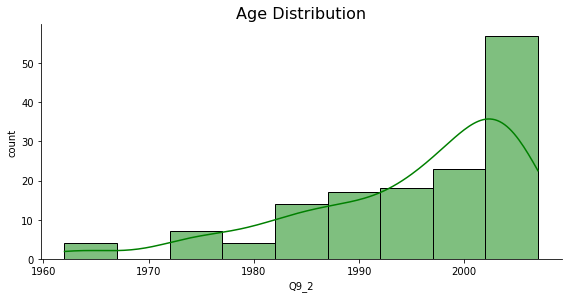

In [ ]:
#plotting displot for income
sns.displot(anouk['Q9_2'], kde=True, height=4, aspect=2, color="g")
plt.title('Age Distribution', size=16, )
plt.ylabel('count');

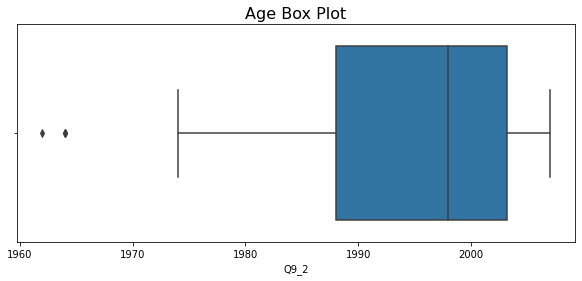

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(anouk['Q9_2'])
plt.title('Age Box Plot', size=16)
plt.show()

In [ ]:
anouk.describe().T

,count,mean,std,min,25%,50%,75%,max
Q9_2,144.0,1994.944444,10.497937,1962.0,1988.0,1998.0,2003.25,2007.0
Q11.1,144.0,0.826389,0.830619,0.0,0.0,1.0,1.00,3.0
Q1_1,144.0,2.916667,0.277350,2.0,3.0,3.0,3.00,3.0
Q2_1,144.0,2.847222,0.415090,1.0,3.0,3.0,3.00,3.0
Q3_1,144.0,1.465278,0.718518,1.0,1.0,1.0,2.00,3.0
Q4_1,144.0,2.944444,0.284268,1.0,3.0,3.0,3.00,3.0
Q5_1,144.0,2.777778,0.493942,1.0,3.0,3.0,3.00,3.0
Q6_1,144.0,2.958333,0.200524,2.0,3.0,3.0,3.00,3.0
Q7_1,144.0,2.888889,0.315367,2.0,3.0,3.0,3.00,3.0
Q8_1,144.0,2.715278,0.537583,1.0,3.0,3.0,3.00,3.0


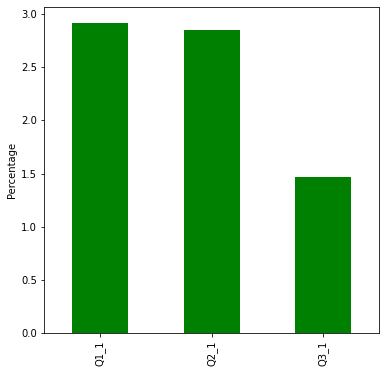

,Q1_1,Q2_1,Q3_1
count,144.00,144.00,144.00
mean,2.92,2.85,1.47
std,0.28,0.42,0.72
min,2.00,1.00,1.00
25%,3.00,3.00,1.00
50%,3.00,3.00,1.00
75%,3.00,3.00,2.00
max,3.00,3.00,3.00


In [ ]:
# PLotting the % acceptance for every campaign

Camp_cols=['Q1_1', 'Q2_1', 'Q3_1']

Score_1=(anouk[Camp_cols].mean())

# plot
Score_1.plot(kind='bar', figsize=(6,6), color="g")
plt.ylabel("Percentage")
plt.show()

anouk[Camp_cols].describe().round(decimals = 2)


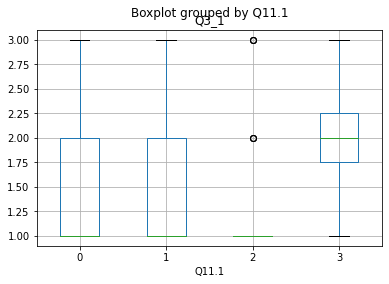

In [ ]:
anouk.boxplot(column=('Q3_1'),by = 'Q11.1')

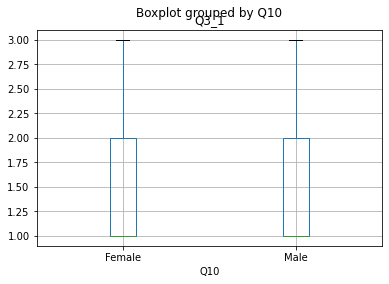

In [ ]:
anouk.boxplot(column=('Q3_1'),by = 'Q10')

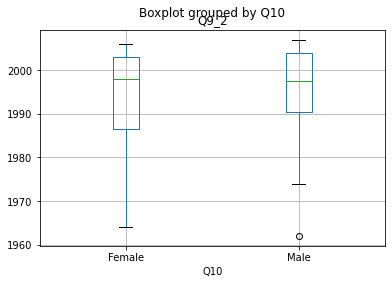

In [ ]:
anouk.boxplot(column=('Q9_2'),by = 'Q10')

Q9_1 : "Please fill in - Athlete's code" => Unique ID of each subject 

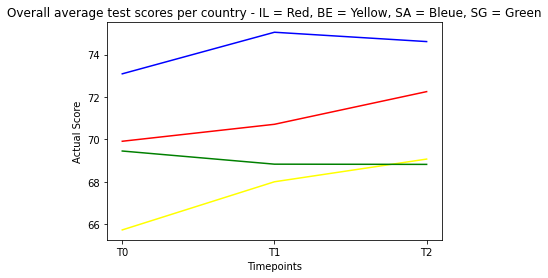

In [ ]:
# Data to be ploted
Test = ("T0","T1","T2")
IL = (69.91, 70.71, 72.25)
BE = (65.73, 68, 69.07)
SA = (73.09, 75.05, 74.61)
SG = (69.45, 68.83, 68.82)


# plotting
plt.title("Overall average test scores per country - IL = Red, BE = Yellow, SA = Bleue, SG = Green")
plt.xlabel("Timepoints")
plt.ylabel("Actual Score")
plt.plot(Test, IL, color ="red")
plt.plot(Test, BE, color ="yellow")
plt.plot(Test, SA, color ="blue")
plt.plot(Test, SG, color ="green")



x = ('T0', 'T1', 'T2', 'T3')
y = (69.91, 70.71, 72.25, 73.25)
y = (65.73, 68, 69.07)
y = (73.09, 75.05, 74.61)
y = (69.45, 68.83, 68.82)

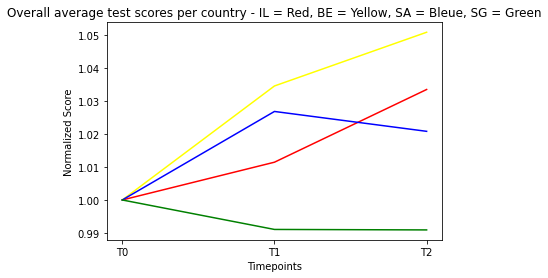

In [ ]:
# Data to be ploted
Test = ("T0","T1","T2")
IL = (69.91/69.91, 70.71/69.91, 72.25/69.91)
BE = (65.73/65.73, 68/65.73, 69.07/65.73)
SA = (73.09/73.09, 75.05/73.09, 74.61/73.09)
SG = (69.45/69.45, 68.83/69.45, 68.82/69.45)


# plotting
plt.title("Overall average test scores per country - IL = Red, BE = Yellow, SA = Bleue, SG = Green")
plt.xlabel("Timepoints")
plt.ylabel("Normalized Score")
plt.plot(Test, IL, color ="red")
plt.plot(Test, BE, color ="yellow")
plt.plot(Test, SA, color ="blue")
plt.plot(Test, SG, color ="green")
